# Training on *Hallelujah* / Testing on *Into Dust* and *Raining Blood*

- Training Set: 80% of *Hallelujah* trials
- Validation Set: 20% of *Hallelujah* trials
- Test Set: All *Into Dust* and *Raining Blood* trials

In [3]:
from fastai.tabular import *

In [6]:
import torch

torch.manual_seed(42)
torch.backends.cudnn.deterministic = True
random.seed(42)

In [3]:
import shutil
try:
    shutil.rmtree(Path('.', 'models'))
except:
    pass

In [4]:
data_path = Path('..', 'data', 'good_reaction_trials.csv')

In [5]:
all_df = pd.read_csv(data_path)

In [6]:
train_df = all_df.loc[all_df.song == 'hallelujah'].copy()
train_df.describe()

,musical_expertise,age,control_activity,control_tension,control_engagement,control_positivity,control_like_dislike,song_chillsshiversthrills,song_activity,song_tension,...,musicpref_jazz,musicpref_folk,musicpref_hiphop,musicpref_classical,musicpref_none,musicpref_rock,musicpref_hip_hop,musicpref_world,musicpref_pop,musicpref_dance
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.711392,24.992405,2.934177,3.326582,3.068354,3.156962,3.043038,2.078481,3.313924,3.934177,...,0.172152,0.073418,0.055696,0.303797,0.010127,0.450633,0.078481,0.134177,0.681013,0.205063
std,1.021468,12.188138,0.831317,0.891116,0.946748,0.837370,0.992700,0.601536,1.011449,1.094853,...,0.377991,0.261152,0.229625,0.460480,0.100247,0.498188,0.269268,0.341275,0.466675,0.404260
min,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,17.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,21.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,31.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,4.000000,5.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,5.000000,81.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
test_df = all_df.loc[all_df.song != 'hallelujah'].copy()
test_df.describe()

,musical_expertise,age,control_activity,control_tension,control_engagement,control_positivity,control_like_dislike,song_chillsshiversthrills,song_activity,song_tension,...,musicpref_jazz,musicpref_folk,musicpref_hiphop,musicpref_classical,musicpref_none,musicpref_rock,musicpref_hip_hop,musicpref_world,musicpref_pop,musicpref_dance
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,...,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,2.726083,26.909366,2.890232,3.157100,3.037261,3.066465,2.980866,1.982880,3.332326,3.611279,...,0.202417,0.079557,0.040282,0.335347,0.007049,0.437059,0.161128,0.174220,0.664653,0.206445
std,0.946925,13.632114,0.665264,0.742905,0.772265,0.685105,0.814830,0.492595,1.136958,1.079479,...,0.402004,0.270742,0.196719,0.472350,0.083706,0.496273,0.367834,0.379489,0.472350,0.404958
min,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,17.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,24.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,33.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,5.000000,81.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
train_df.location.unique(), test_df.location.unique()

(array(['dublin', 'taichung_city', 'taipei_city'], dtype=object),
 array(['dublin', 'taipei_city', 'taichung_city', 'bergen', 'manila', 'singapore', 'nyc'], dtype=object))

In [8]:
train_df.columns

Index(['_id', 'location', 'sex', 'musical_background', 'nationality',
       'visual_impairments', 'musical_expertise', 'hearing_impairments', 'age',
       'critical_reaction', 'control_activity', 'control_tension',
       'control_engagement', 'control_positivity', 'control_like_dislike',
       'song_chillsshiversthrills', 'song_activity', 'song_tension',
       'song_familiarity', 'song_engagement', 'song_positivity',
       'song_like_dislike', 'song_inspired', 'song_wonder',
       'song_spirituality', 'song_thrills', 'song_chills', 'song_tenderness',
       'song_nostalgia', 'song_goosebumps', 'song_overwhelmed', 'song_shivers',
       'control_power', 'song_transcendence', 'song_sadness',
       'song_joyfulactivation', 'song_peacefulness', 'song_power', 'language',
       'personality_trusting', 'personality_artistic',
       'personality_imagination', 'personality_reserved',
       'personality_outgoing', 'personality_lazy', 'personality_stress',
       'personality_nervous',

# Define model

In [9]:
cat_names = [
    'location', 'sex', 'musical_background', 'nationality', 'visual_impairments', 'hearing_impairments',
    'musicpref_traditional_irish', 'musicpref_jazz', 'musicpref_folk', 'musicpref_hiphop',
    'musicpref_classical', 'musicpref_none', 'musicpref_rock', 'musicpref_hip_hop', 'musicpref_world', 
    'musicpref_pop', 'musicpref_dance', 'language'
]

cont_names = [
    'musical_expertise', 'age', 'control_activity', 'control_tension', 'control_engagement',
    'control_positivity', 'control_like_dislike', 'song_chillsshiversthrills', 'song_activity', 'song_tension',
    'song_familiarity', 'song_engagement', 'song_positivity', 'song_like_dislike', 'song_inspired', 'song_wonder',
    'song_spirituality', 'song_thrills', 'song_chills', 'song_tenderness', 'song_nostalgia', 'song_goosebumps',
    'song_overwhelmed', 'song_shivers', 'control_power', 'song_transcendence', 'song_sadness',
    'song_joyfulactivation', 'song_peacefulness', 'song_power', 'personality_trusting', 'personality_artistic',
    'personality_imagination', 'personality_reserved', 'personality_outgoing', 'personality_lazy',
    'personality_stress', 'personality_nervous', 'personality_fault', 'personality_thorough', 'concentration'
]

dep_var = 'critical_reaction'

In [10]:
procs = [FillMissing, Categorify, Normalize]

datalist_train = TabularList.from_df(df=train_df, 
                                     cat_names=cat_names, 
                                     cont_names=cont_names, 
#                                      dep_var=dep_var, 
                                     procs=procs)
#                                      num_workers=1)

# datalist_test = TabularList.from_df(df=test_df, 
#                                     cat_names=cat_names, 
#                                     cont_names=cont_names, 
#                                     num_workers=1,
#                                     dep_var=dep_var)

databunch = datalist_train.random_split_by_pct()
databunch = databunch.label_from_df(cols=dep_var, label_cls=CategoryList)#, log=False)
# databunch = databunch.add_test(items=datalist_test)
databunch = databunch.process()
databunch = databunch.databunch(num_workers=1)

databunch.batch_size = 256

In [11]:
emb_szs = {}

for k in cat_names:
    if len(all_df[k].unique()) < 4:
        emb_szs[k] = 2
    else:
        emb_szs[k] = len(all_df[k].unique()) - 1


input_n = sum([k[1] for k in emb_szs.items()]) + len(cont_names)

learner = tabular_learner(data=databunch, 
                          layers=[input_n, input_n // 2, input_n // 4], 
                          emb_szs=emb_szs, 
                          emb_drop=0.25,
                          ps=[0.25])

early_stopper = callbacks.EarlyStoppingCallback(learner, patience=50)
model_saver = callbacks.SaveModelCallback(learner)

learner.callbacks.append(early_stopper)
learner.callbacks.append(model_saver)

In [12]:
learner.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(4, 6)
    (1): Embedding(3, 2)
    (2): Embedding(3, 2)
    (3): Embedding(11, 15)
    (4): Embedding(2, 2)
    (5): Embedding(3, 2)
    (6): Embedding(3, 2)
    (7): Embedding(3, 2)
    (8): Embedding(3, 2)
    (9): Embedding(3, 2)
    (10): Embedding(3, 2)
    (11): Embedding(3, 2)
    (12): Embedding(3, 2)
    (13): Embedding(3, 2)
    (14): Embedding(3, 2)
    (15): Embedding(3, 2)
    (16): Embedding(3, 2)
    (17): Embedding(4, 3)
  )
  (emb_drop): Dropout(p=0.25)
  (bn_cont): BatchNorm1d(41, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=95, out_features=95, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(95, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.25)
    (4): Linear(in_features=95, out_features=47, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(47, eps=1e-05, momentum=0.1, affine=True, track_ru

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


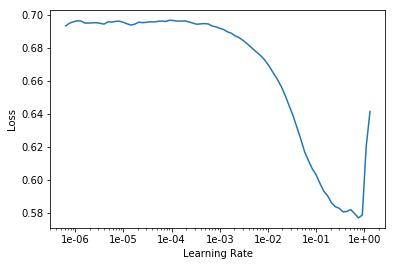

In [13]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss
1,0.703755,0.683217
2,0.693183,0.680757
3,0.681745,0.676864
4,0.676833,0.671185
5,0.675317,0.663869
6,0.670254,0.653768
7,0.661418,0.639182
8,0.652347,0.620478
9,0.645201,0.600980
10,0.637031,0.579105


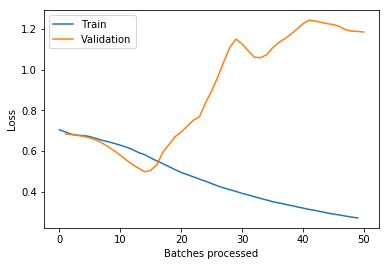

In [14]:
learner.fit_one_cycle(cyc_len=50, max_lr=3*1e-2)
learner.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


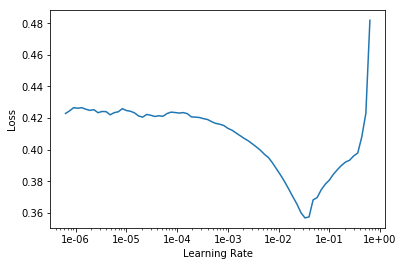

In [15]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss
1,0.438470,0.499053
2,0.430530,0.499762
3,0.435185,0.501435
4,0.428804,0.503108
5,0.434551,0.504770
6,0.434875,0.507000
7,0.438236,0.509586
8,0.436260,0.512013
9,0.434017,0.514770
10,0.435718,0.517579


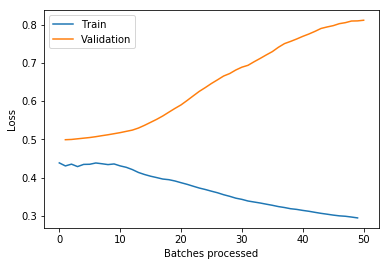

In [16]:
learner.fit_one_cycle(cyc_len=50, max_lr=2*1e-3)
learner.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


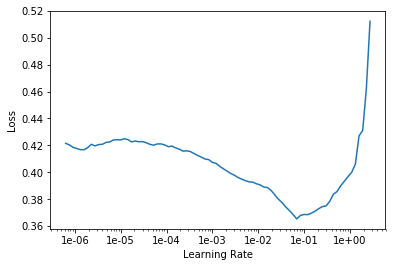

In [17]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss
1,0.407412,0.500232
2,0.439701,0.501112
3,0.430092,0.502209
4,0.429980,0.504272
5,0.433685,0.506035
6,0.429582,0.508312
7,0.422644,0.510258
8,0.418524,0.512555
9,0.414336,0.514867
10,0.412308,0.517661


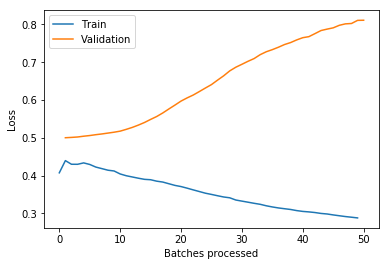

In [18]:
learner.fit_one_cycle(cyc_len=50, max_lr=2*1e-3)
learner.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


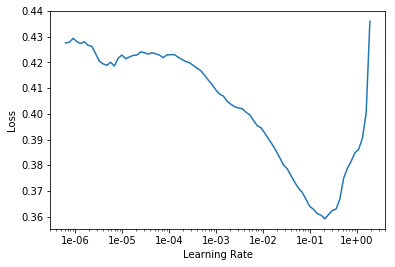

In [19]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss
1,0.469089,0.500715
2,0.445579,0.502212
3,0.432578,0.503979
4,0.415994,0.506612
5,0.415274,0.510124
6,0.412372,0.516815
7,0.406435,0.527941
8,0.395957,0.545601
9,0.390863,0.569691
10,0.381938,0.606075


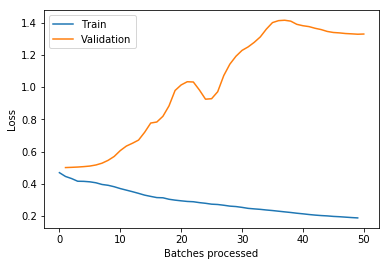

In [20]:
learner.fit_one_cycle(cyc_len=50, max_lr=2*1e-2)
learner.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


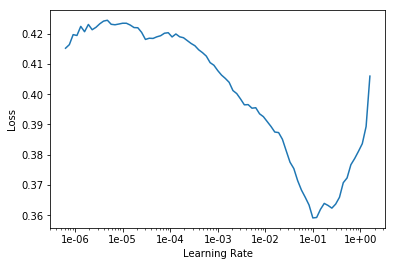

In [21]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss
1,0.439089,0.502295
2,0.424280,0.503760
3,0.420254,0.506013
4,0.428663,0.508589
5,0.410641,0.511455
6,0.399510,0.515374
7,0.392946,0.521132
8,0.388062,0.529418
9,0.382723,0.540938
10,0.378952,0.553471


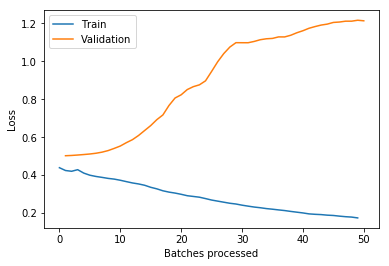

In [22]:
learner.fit_one_cycle(cyc_len=50, max_lr=1e-2)
learner.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


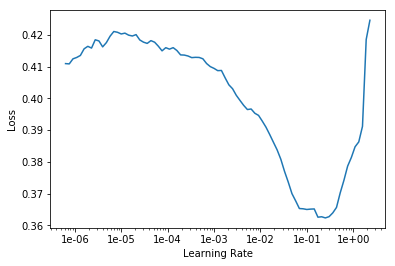

In [23]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss
1,0.427091,0.504219
2,0.436076,0.506310
3,0.418980,0.508945
4,0.407304,0.511939
5,0.405988,0.515142
6,0.402762,0.518587
7,0.395144,0.523129
8,0.388154,0.530126
9,0.385484,0.540491
10,0.378329,0.556666


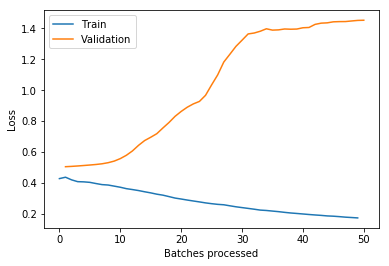

In [24]:
learner.fit_one_cycle(cyc_len=50, max_lr=1e-2)
learner.recorder.plot_losses()

# Results

In [25]:
learner.load(Path('bestmodel'))
learner.export()
inference_learner = load_learner(Path('.'))

In [26]:
def get_results_df(inference_learner, inference_df):
    res_df = pd.DataFrame()

    for i, r in list(inference_df.iterrows()):
        target = r.critical_reaction
        prediction = inference_learner.predict(r)
        pred_cat, pred_false_prob, pred_true_prob = prediction[0].obj, prediction[2][0], prediction[2][1]
        this_df = pd.DataFrame({'target': float(target), 
                                'prediction': float(pred_cat), 
                                'false_prob': float(pred_false_prob), 
                                'true_prob': float(pred_true_prob)}, index=[i])
        res_df = pd.concat([res_df, this_df], axis=0)

    return res_df

In [27]:
res_df = get_results_df(inference_learner, train_df)
preds_test = res_df.true_prob
targets_test = res_df.target

In [28]:
def plot_pr_curve(targets, predictions, beta=1):
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    from sklearn.utils.fixes import signature
    from sklearn.metrics import average_precision_score

    average_precision = average_precision_score(targets, predictions)

    print('Average precision-recall score: {0:0.2f}'.format(
          average_precision))

    precision, recall, thresholds = precision_recall_curve(targets, predictions)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(12,24))
    plt.sca(ax1)
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([-0.05, 1.05])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))
    
    eps = 1e-10
    def fbeta(precision, recall, beta):
        return (1 + beta**2) * ((precision * recall) / (beta**2 * precision + recall + eps))
    
    fbetas = []
    for i, t in enumerate(thresholds):
        fbetas.append(fbeta(precision[i], recall[i], beta))
    
    max_fbeta = fbeta(1., 1., beta)
    plt.sca(ax2)
    plt.plot(thresholds, fbetas)
    plt.xlabel('Threshold Value')
    plt.ylabel(r'$F_\beta$')
    plt.ylim([0.0, max_fbeta])
    plt.xlim([-0.05, 1.05])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))

Average precision-recall score: 0.32


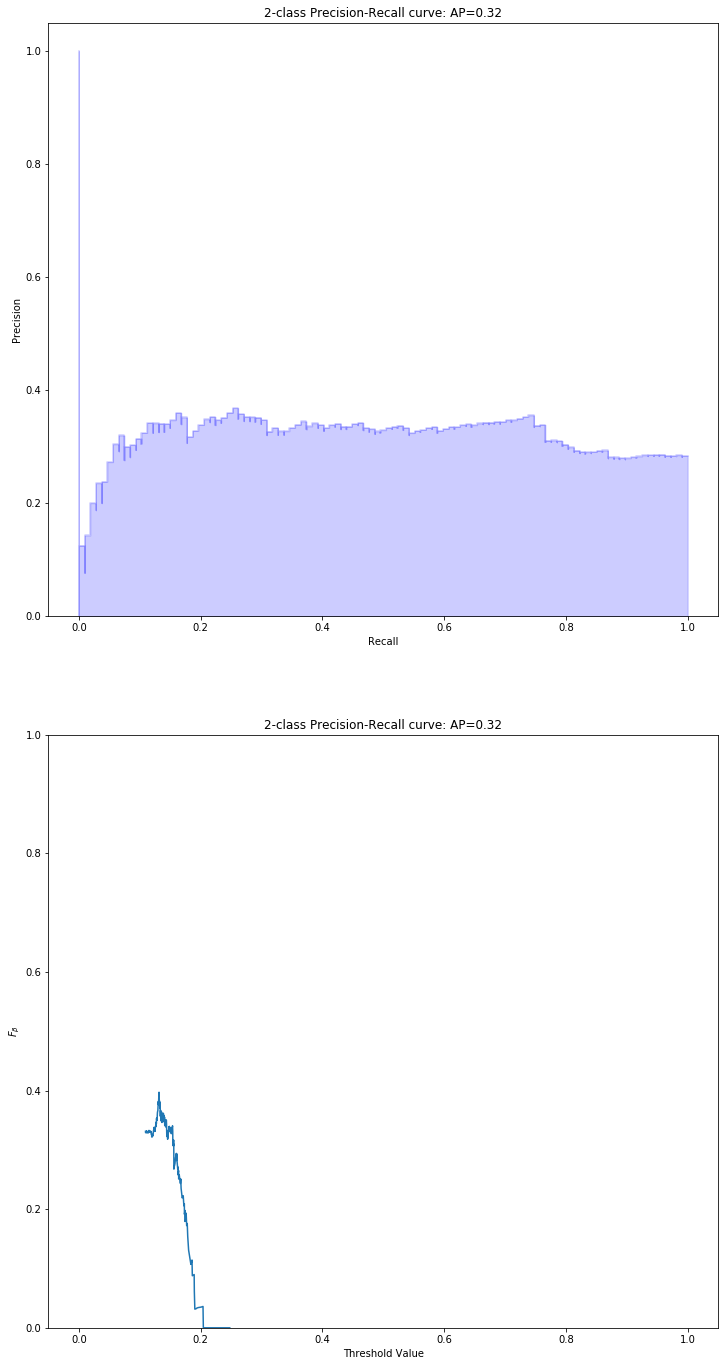

In [29]:
plot_pr_curve(targets_test, preds_test, 0.5)

In [34]:
# class TabularClassifierModel(nn.Module):
#     "Classifier model for tabular data."
#     def __init__(self, emb_szs:ListSizes, n_cont:int, out_sz:int, layers:Collection[int], ps:Collection[float]=None,
#                  emb_drop:float=0., y_range:OptRange=None, use_bn:bool=True, bn_final:bool=False):
#         super().__init__()
#         ps = ifnone(ps, [0]*len(layers))
#         ps = listify(ps, layers)
#         self.embeds = nn.ModuleList([embedding(ni, nf) for ni,nf in emb_szs])
#         self.emb_drop = nn.Dropout(emb_drop)
#         self.bn_cont = nn.BatchNorm1d(n_cont)
#         n_emb = sum(e.embedding_dim for e in self.embeds)
#         self.n_emb,self.n_cont,self.y_range = n_emb,n_cont,y_range
#         sizes = self.get_sizes(layers, out_sz)
#         actns = [nn.ReLU(inplace=True)] * (len(sizes)-2) + [None]
#         layers = []
#         for i,(n_in,n_out,dp,act) in enumerate(zip(sizes[:-1],sizes[1:],[0.]+ps,actns)):
#             layers += bn_drop_lin(n_in, n_out, bn=use_bn and i!=0, p=dp, actn=act)
#         if bn_final: layers.append(nn.BatchNorm1d(sizes[-1]))
#         self.layers = nn.Sequential(*layers)

#     def get_sizes(self, layers, out_sz):
#         return [self.n_emb + self.n_cont] + layers + [out_sz]

#     def forward(self, x_cat:Tensor, x_cont:Tensor) -> Tensor:
#         if self.n_emb != 0:
#             x = [e(x_cat[:,i]) for i,e in enumerate(self.embeds)]
#             x = torch.cat(x, 1)
#             x = self.emb_drop(x)
#         if self.n_cont != 0:
#             x_cont = self.bn_cont(x_cont)
#             x = torch.cat([x, x_cont], 1) if self.n_emb != 0 else x_cont
#         x = self.layers(x)
#         if self.y_range is not None:
#             x = (self.y_range[1]-self.y_range[0]) * torch.sigmoid(x) + self.y_range[0]
#         return x